# Google Play Store Apps EDA

Context
While many public datasets (on Kaggle and the like) provide Apple App Store data, there are not many counterpart datasets available for Google Play Store apps anywhere on the web. On digging deeper, I found out that iTunes App Store page deploys a nicely indexed appendix-like structure to allow for simple and easy web scraping. On the other hand, Google Play Store uses sophisticated modern-day techniques (like dynamic page load) using JQuery making scraping more challenging.





In [1]:
# Importing Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np



In [2]:
# Loading the data set
df = pd.read_csv('googleplaystore.csv')
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
# Let's have a look on Top 5 rows of the data
df.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
# Set Options to be maximum for rows and column
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [5]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [6]:
print("The Names of the data in this dataset are as follows:",df.columns)

The Names of the data in this dataset are as follows: Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')


In [7]:
print('The Number of Rows are',df.shape[0] ,'And the Number of Columns are',df.shape[1])


The Number of Rows are 10841 And the Number of Columns are 13


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [9]:
# How to make size a numeric column?
df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

### 1. Size of the app varies with device 
## k
## M

In [10]:
df['Size'].isnull().sum()

0

- No missing values on the size so we are good to go with it

In [11]:
# Find the values having M in them
df['Size'].loc[df['Size'].str.contains('M')].value_counts()


Size
11M      198
12M      196
14M      194
13M      191
15M      184
17M      160
19M      154
16M      149
26M      149
25M      143
20M      139
21M      138
10M      136
24M      136
18M      133
23M      117
22M      114
29M      103
27M       97
28M       95
30M       84
33M       79
3.3M      77
37M       76
35M       72
31M       70
2.9M      69
2.3M      68
2.5M      68
3.4M      65
2.8M      65
34M       63
32M       63
3.7M      63
40M       62
3.8M      62
3.9M      62
4.0M      61
44M       61
3.0M      61
36M       60
4.2M      59
48M       59
46M       59
5.0M      58
3.6M      57
39M       56
3.1M      56
3.2M      55
38M       55
4.3M      54
2.7M      53
4.1M      52
2.0M      51
5.4M      51
3.5M      51
4.9M      50
1.8M      50
2.6M      50
5.7M      48
1.5M      48
41M       48
2.4M      48
43M       47
4.6M      46
49M       45
2.2M      45
6.3M      45
5.3M      44
50M       44
5.1M      43
53M       43
4.4M      42
63M       41
1.2M      41
42M       41
45M    

In [12]:
# Find the values having K in them
df['Size'].loc[df['Size'].str.contains('k')].value_counts().sum()


316

In [13]:
# Find the values having Varies with device in them
df['Size'].loc[df['Size'].str.contains('Varies with device')].value_counts().sum()


1695

In [14]:
len(df)

10841

In [15]:
# Convert the whole size column into megabytes
# Let's define the function
def convert_size(size):
     if isinstance(size, str):
          if 'k' in size:
               return float(size.replace('k',"")) * 1024
          elif 'M' in size:
                return float(size.replace('M',"")) * 1024 * 1024
          elif 'Varies with device' in size:
               return np.nan
     return size
    
    

In [16]:
# Apply the above function
df['Size'] = df['Size'].apply(convert_size)


In [17]:
df['Size']

0         19922944.0
1         14680064.0
2          9122611.2
3         26214400.0
4          2936012.8
5          5872025.6
6         19922944.0
7         30408704.0
8         34603008.0
9          3250585.6
10        29360128.0
11        12582912.0
12        20971520.0
13        22020096.0
14        38797312.0
15         2831155.2
16         5767168.0
17        17825792.0
18        40894464.0
19        32505856.0
20        14680064.0
21        12582912.0
22         4404019.2
23         7340032.0
24        24117248.0
25         6291456.0
26        26214400.0
27         6396313.6
28         4823449.6
29         4404019.2
30         9646899.2
31         5452595.2
32        11534336.0
33        11534336.0
34         4404019.2
35         9646899.2
36        25165824.0
37               NaN
38        11534336.0
39         9856614.4
40        15728640.0
41        10485760.0
42               NaN
43         1258291.2
44        12582912.0
45        25165824.0
46        27262976.0
47         83

In [18]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19922944.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14680064.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,9122611.2,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,26214400.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2936012.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [19]:
# # convert size in byte column
# df['Size_in_Mb'] = df['Size'].apply(lambda x: x/(1024*1024))


In [20]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19922944.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14680064.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,9122611.2,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,26214400.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2936012.8,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [21]:
# Let's take care of install column
df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0', 'Free'], dtype=object)

In [22]:
# Remove '+' sign from 'Installs' column
df['Installs'] = df['Installs'].str.replace('+', '')

# Remove ',' from 'Installs' column
df['Installs'] = df['Installs'].str.replace(',', '')

# Print unique values in 'Installs' column to verify the changes
print(df['Installs'].unique())
df.head()

['10000' '500000' '5000000' '50000000' '100000' '50000' '1000000'
 '10000000' '5000' '100000000' '1000000000' '1000' '500000000' '50' '100'
 '500' '10' '1' '5' '0' 'Free']


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19922944.0,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14680064.0,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,9122611.2,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,26214400.0,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2936012.8,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [23]:
df['Installs'].value_counts()

Installs
1000000       1579
10000000      1252
100000        1169
10000         1054
1000           907
5000000        752
100            719
500000         539
50000          479
5000           477
100000000      409
10             386
500            330
50000000       289
50             205
5               82
500000000       72
1               67
1000000000      58
0               15
Free             1
Name: count, dtype: int64

In [24]:
df['Installs'].value_counts()

Installs
1000000       1579
10000000      1252
100000        1169
10000         1054
1000           907
5000000        752
100            719
500000         539
50000          479
5000           477
100000000      409
10             386
500            330
50000000       289
50             205
5               82
500000000       72
1               67
1000000000      58
0               15
Free             1
Name: count, dtype: int64

In [25]:
df['Installs'].value_counts()

Installs
1000000       1579
10000000      1252
100000        1169
10000         1054
1000           907
5000000        752
100            719
500000         539
50000          479
5000           477
100000000      409
10             386
500            330
50000000       289
50             205
5               82
500000000       72
1               67
1000000000      58
0               15
Free             1
Name: count, dtype: int64

# Price Column

In [26]:
df['Price'].value_counts()

Price
0           10040
$0.99         148
$2.99         129
$1.99          73
$4.99          72
$3.99          63
$1.49          46
$5.99          30
$2.49          26
$9.99          21
$6.99          13
$399.99        12
$14.99         11
$4.49           9
$29.99          7
$24.99          7
$3.49           7
$7.99           7
$5.49           6
$19.99          6
$11.99          5
$6.49           5
$12.99          5
$8.99           5
$10.00          3
$16.99          3
$1.00           3
$2.00           3
$13.99          2
$8.49           2
$17.99          2
$1.70           2
$3.95           2
$79.99          2
$7.49           2
$9.00           2
$10.99          2
$39.99          2
$33.99          2
$19.40          1
$3.90           1
$1.96           1
$4.60           1
$15.46          1
$3.04           1
$4.29           1
$2.60           1
$3.28           1
$4.80           1
$4.59           1
$3.08           1
$28.99          1
$2.95           1
$2.90           1
$1.97           1
$200

In [27]:
# Remove '$' from 'Price' column
df['Price'] = df['Price'].str.replace('$', '')

In [28]:
df['Price'].value_counts()

Price
0           10040
0.99          148
2.99          129
1.99           73
4.99           72
3.99           63
1.49           46
5.99           30
2.49           26
9.99           21
6.99           13
399.99         12
14.99          11
4.49            9
29.99           7
24.99           7
3.49            7
7.99            7
5.49            6
19.99           6
11.99           5
6.49            5
12.99           5
8.99            5
10.00           3
16.99           3
1.00            3
2.00            3
13.99           2
8.49            2
17.99           2
1.70            2
3.95            2
79.99           2
7.49            2
9.00            2
10.99           2
39.99           2
33.99           2
19.40           1
3.90            1
1.96            1
4.60            1
15.46           1
3.04            1
4.29            1
2.60            1
3.28            1
4.80            1
4.59            1
3.08            1
28.99           1
2.95            1
2.90            1
1.97            1
200.

In [29]:
df['Price'].value_counts()


Price
0           10040
0.99          148
2.99          129
1.99           73
4.99           72
3.99           63
1.49           46
5.99           30
2.49           26
9.99           21
6.99           13
399.99         12
14.99          11
4.49            9
29.99           7
24.99           7
3.49            7
7.99            7
5.49            6
19.99           6
11.99           5
6.49            5
12.99           5
8.99            5
10.00           3
16.99           3
1.00            3
2.00            3
13.99           2
8.49            2
17.99           2
1.70            2
3.95            2
79.99           2
7.49            2
9.00            2
10.99           2
39.99           2
33.99           2
19.40           1
3.90            1
1.96            1
4.60            1
15.46           1
3.04            1
4.29            1
2.60            1
3.28            1
4.80            1
4.59            1
3.08            1
28.99           1
2.95            1
2.90            1
1.97            1
200.

In [30]:
df['Size'].isnull().sum()

1695

In [31]:
df['Price'].value_counts()

Price
0           10040
0.99          148
2.99          129
1.99           73
4.99           72
3.99           63
1.49           46
5.99           30
2.49           26
9.99           21
6.99           13
399.99         12
14.99          11
4.49            9
29.99           7
24.99           7
3.49            7
7.99            7
5.49            6
19.99           6
11.99           5
6.49            5
12.99           5
8.99            5
10.00           3
16.99           3
1.00            3
2.00            3
13.99           2
8.49            2
17.99           2
1.70            2
3.95            2
79.99           2
7.49            2
9.00            2
10.99           2
39.99           2
33.99           2
19.40           1
3.90            1
1.96            1
4.60            1
15.46           1
3.04            1
4.29            1
2.60            1
3.28            1
4.80            1
4.59            1
3.08            1
28.99           1
2.95            1
2.90            1
1.97            1
200.

In [33]:
# Missing Values
df.isnull().sum()/len(df)*100

App                0.000000
Category           0.000000
Rating            13.596532
Reviews            0.000000
Size              15.635089
Installs           0.000000
Type               0.009224
Price              0.000000
Content Rating     0.009224
Genres             0.000000
Last Updated       0.000000
Current Ver        0.073794
Android Ver        0.027673
dtype: float64

In [34]:
# FIND total number of missing values
df.isnull().sum().sum()

3182

<Axes: >

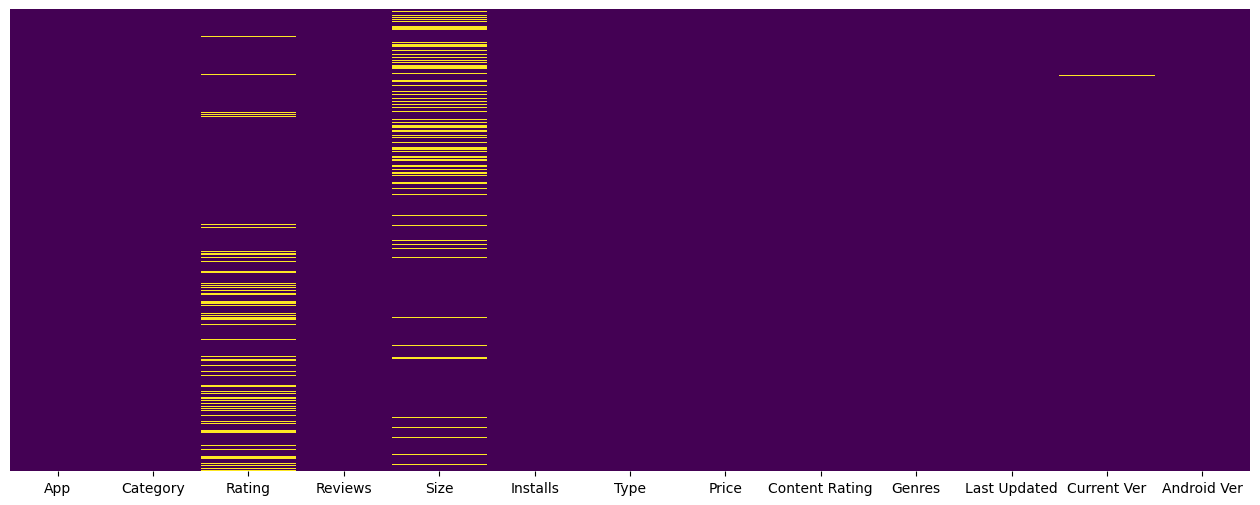

In [35]:
#   Plot Missing values
plt.figure(figsize=(16,6))
sns.heatmap(df.isnull(),yticklabels=False, cbar=False,cmap='viridis')

Text(0.5, 1.0, 'Percentage of missing values in each colunmns')

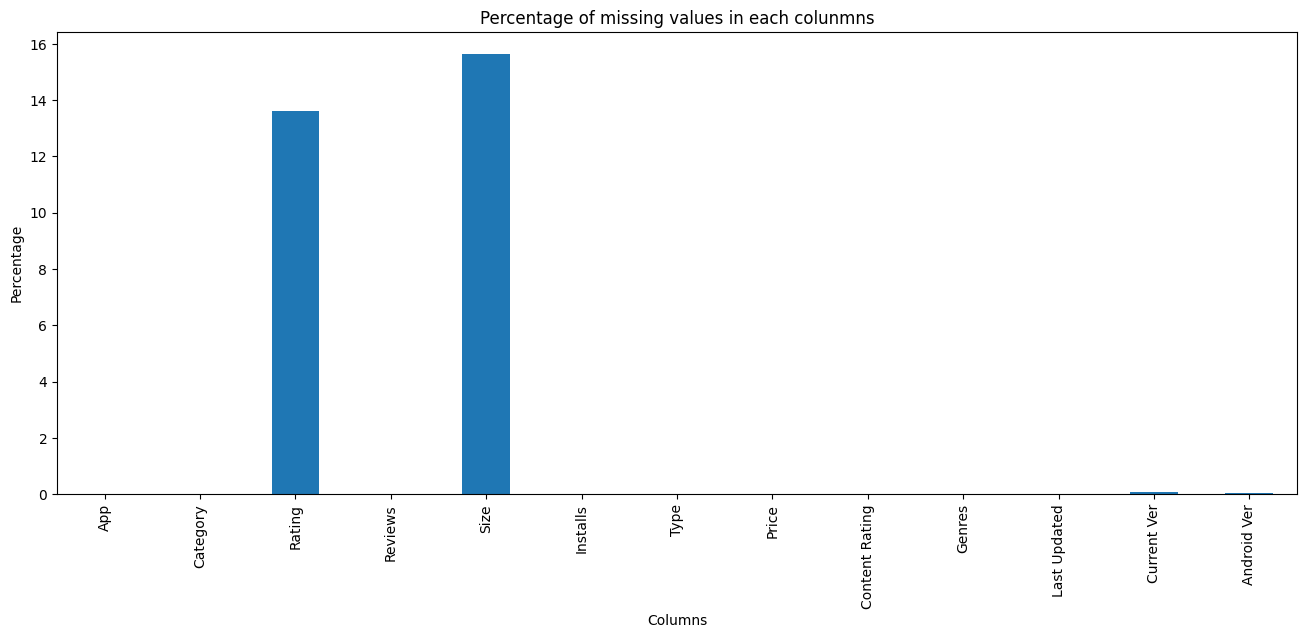

In [37]:
#   Plot Missing values in Percentage
plt.figure(figsize=(16,6))
missing_percentage = df.isnull().sum()/len(df)*100
missing_percentage.plot(kind='bar')
plt.xlabel('Columns')
plt.ylabel('Percentage')
plt.title('Percentage of missing values in each colunmns')


<Axes: >

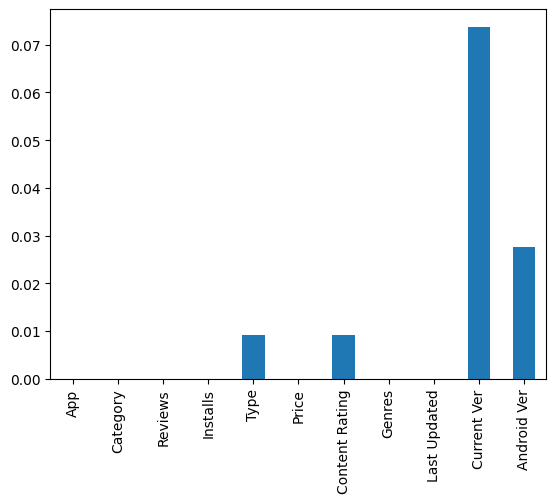

In [38]:
missing_percentage[missing_percentage < 1].plot(kind='bar')